In [129]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, 
                              AdaBoostClassifier, BaggingRegressor,GradientBoostingClassifier)
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve,auc
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score


In [130]:

data=pd.read_csv('C:/Users/ERDEM/Project_3/spotifydata3.csv')

In [131]:
data.head(10)

,Unnamed: 0,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,YEAR,mode2
0,0,Train,"Hey, Soul Sister",1,0.673,0.886,1,-4.440,0,0.0431,0.18500,0.000000,0.0826,0.795,97.012,216773,4,2010,minor
1,1,Bruno Mars,Just the Way You Are,1,0.637,0.843,5,-5.413,1,0.0432,0.01510,0.000000,0.0876,0.434,109.012,220733,4,2010,major
2,2,Jason Aldean,Dirt Road Anthem,1,0.680,0.741,2,-5.055,1,0.0357,0.34700,0.000002,0.1170,0.635,127.024,229400,4,2010,major
3,3,Eminem,Love The Way You Lie,1,0.749,0.925,10,-5.034,1,0.2270,0.24100,0.000000,0.5200,0.641,86.989,263373,4,2010,major
4,4,Waka Flocka Flame,No Hands (feat. Roscoe Dash & Wale),1,0.760,0.595,1,-6.366,1,0.0391,0.00544,0.000000,0.2410,0.361,131.497,263773,4,2010,major
5,5,Kesha,TiK ToK,1,0.755,0.837,2,-2.718,0,0.1420,0.09910,0.000000,0.2890,0.714,120.028,199693,4,2010,minor
6,6,Bruno Mars,Grenade,1,0.706,0.558,2,-7.237,0,0.0593,0.14600,0.000000,0.1180,0.227,110.443,223253,4,2010,minor
7,7,Kanye West,POWER,1,0.543,0.915,0,-4.746,0,0.1130,0.01620,0.000000,0.7440,0.577,153.998,292093,4,2010,minor
8,8,Nicki Minaj,Super Bass,1,0.720,0.861,11,-4.339,1,0.2090,0.26900,0.000005,0.6010,0.669,126.991,200013,4,2010,major
9,9,Bruno Mars,Talking to the Moon,1,0.523,0.606,1,-4.754,0,0.0301,0.51200,0.000000,0.1060,0.065,145.837,217867,4,2010,minor


In [132]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21073 entries, 0 to 21072
Data columns (total 18 columns):
artist_name         21073 non-null object
track_name          21073 non-null object
popularity          21073 non-null int64
danceability        21073 non-null float64
energy              21073 non-null float64
key                 21073 non-null int64
loudness            21073 non-null float64
mode                21073 non-null int64
speechiness         21073 non-null float64
acousticness        21073 non-null float64
instrumentalness    21073 non-null float64
liveness            21073 non-null float64
valence             21073 non-null float64
tempo               21073 non-null float64
duration_ms         21073 non-null int64
time_signature      21073 non-null int64
YEAR                21073 non-null int64
mode2               21073 non-null object
dtypes: float64(9), int64(6), object(3)
memory usage: 2.9+ MB


In [134]:
data.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,YEAR
count,21073.000000,21073.000000,21073.000000,21073.000000,21073.000000,21073.000000,21073.000000,21073.000000,21073.000000,21073.000000,21073.000000,21073.000000,2.107300e+04,21073.000000,21073.000000
mean,0.528306,0.589995,0.609972,5.196365,-7.975169,0.650548,0.101362,0.285304,0.093086,0.187981,0.451505,120.286511,2.222458e+05,3.903668,2014.978693
std,0.499210,0.177489,0.234722,3.587100,5.478289,0.476808,0.109582,0.312543,0.254217,0.153732,0.241964,30.888470,9.056516e+04,0.459774,3.138231
min,0.000000,0.000000,0.000020,0.000000,-54.837000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.013300e+04,0.000000,2010.000000
25%,0.000000,0.484000,0.470000,2.000000,-8.812000,0.000000,0.036800,0.028200,0.000000,0.097700,0.261000,95.999000,1.853930e+05,4.000000,2012.000000
50%,1.000000,0.604000,0.643000,5.000000,-6.473000,1.000000,0.052700,0.148000,0.000002,0.123000,0.436000,120.018000,2.147070e+05,4.000000,2015.000000
75%,1.000000,0.719000,0.791000,8.000000,-4.888000,1.000000,0.115000,0.479000,0.001170,0.228000,0.631000,140.130000,2.472410e+05,4.000000,2018.000000
max,1.000000,0.986000,1.000000,11.000000,1.023000,1.000000,0.950000,0.996000,1.000000,0.990000,0.990000,220.099000,5.403500e+06,5.000000,2020.000000


In [135]:
data.columns

Index(['artist_name', 'track_name', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'YEAR', 'mode2'],
      dtype='object')

Mean value for danceability: 0.5899951644284203


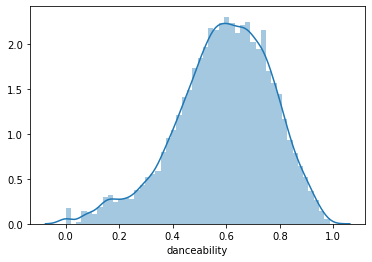

In [8]:
print("Mean value for danceability:", data['danceability'].mean())
sns.distplot(data['danceability'])
plt.show()

Mean value for energy: 0.6099716201252805


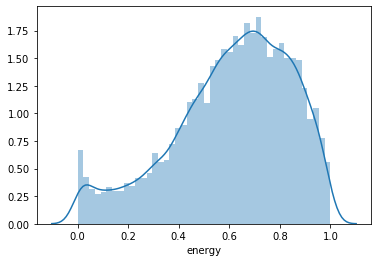

In [9]:
print("Mean value for energy:", data['energy'].mean())
sns.distplot(data['energy'])
plt.show()

Mean value for mode feature: 0.65054809471836


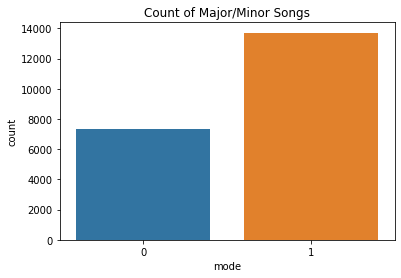

In [10]:
print("Mean value for mode feature:", data['mode'].mean())

#mapping
mode_mapping = {1.0: "major", 0.0: "minor"}
data['mode2'] = data['mode'].map(mode_mapping)

#countplot
sns.countplot(x = 'mode', data=data)
plt.title("Count of Major/Minor Songs")
plt.show()

Mean value for valence feature: 0.45150510710387454


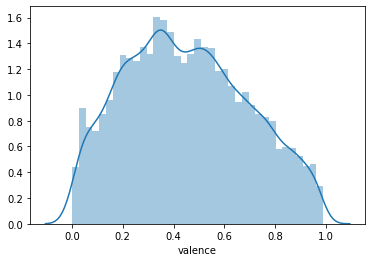

In [11]:
print('Mean value for valence feature:', data['valence'].mean())
sns.distplot(data['valence'])
plt.show()


Mean value for duration_ms feature: 222245.76301428367


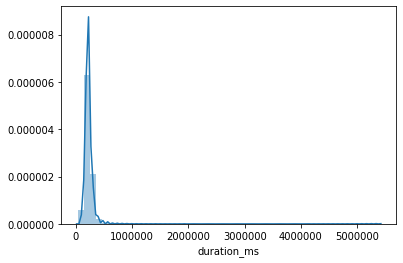

In [12]:
print('Mean value for duration_ms feature:', data['duration_ms'].mean())
sns.distplot(data['duration_ms'])
plt.show()

Text(0.5, 1.0, 'Popularity Based on year')

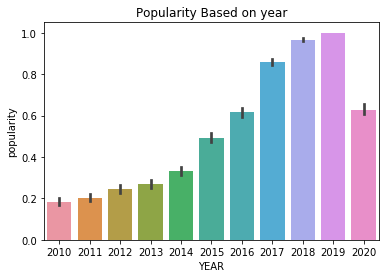

In [80]:
sns.barplot(x = 'YEAR', y = 'popularity', data = data)
plt.title('Popularity Based on year')

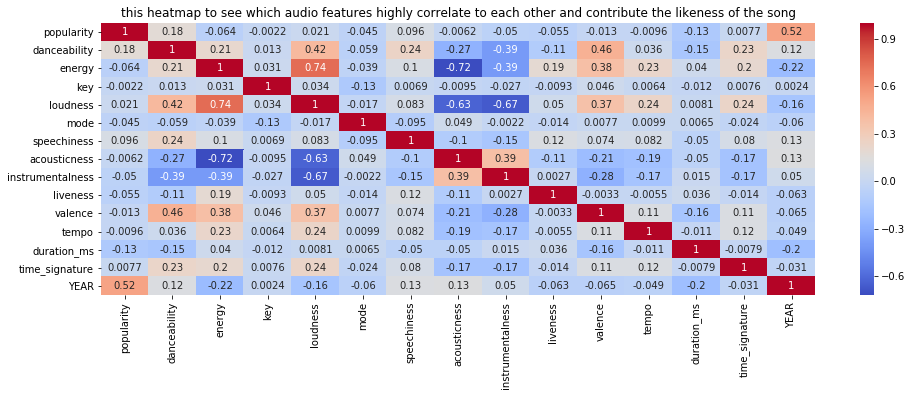

In [13]:
plt.figure(figsize = (16,5))
sns.heatmap(data.corr(), cmap="coolwarm", annot=True)
plt.title("this heatmap to see which audio features highly correlate to each other and contribute the likeness of the song")
plt.show()

In [14]:
def corr_heatmap(data):
    corr_matrix = data.corr()
    mask = np.zeros_like(corr_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)]= True
    f, ax = plt.subplots(figsize=(11, 15)) 
    heatmap = sns.heatmap(corr_matrix, 
                          mask = mask,
                          square = True,
                          linewidths = .5,
                          cmap = 'coolwarm',
                          cbar_kws = {'shrink': .4, 
                                    'ticks' : [-1, -.5, 0, 0.5, 1]},
                          vmin = -1, 
                          vmax = 1,
                          annot = True,
                          annot_kws = {'size': 12})#add the column names as labels
    ax.set_yticklabels(corr_matrix.columns, rotation = 0)
    ax.set_xticklabels(corr_matrix.columns)
    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

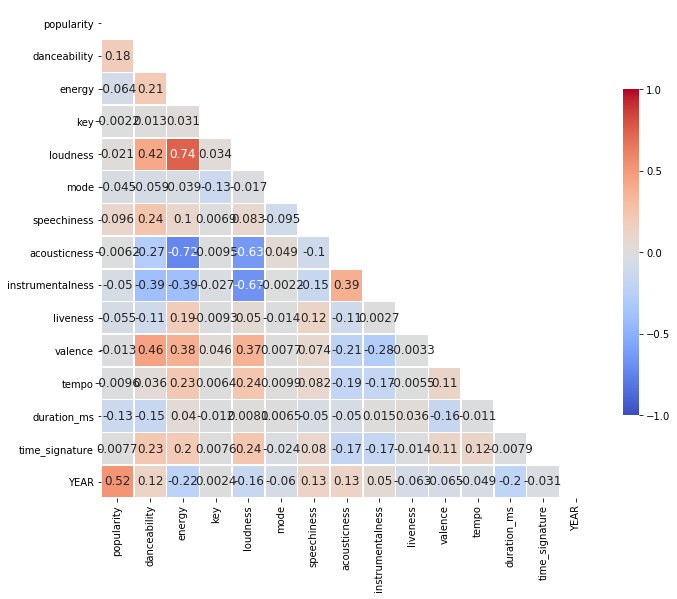

In [15]:

corr_heatmap(data)


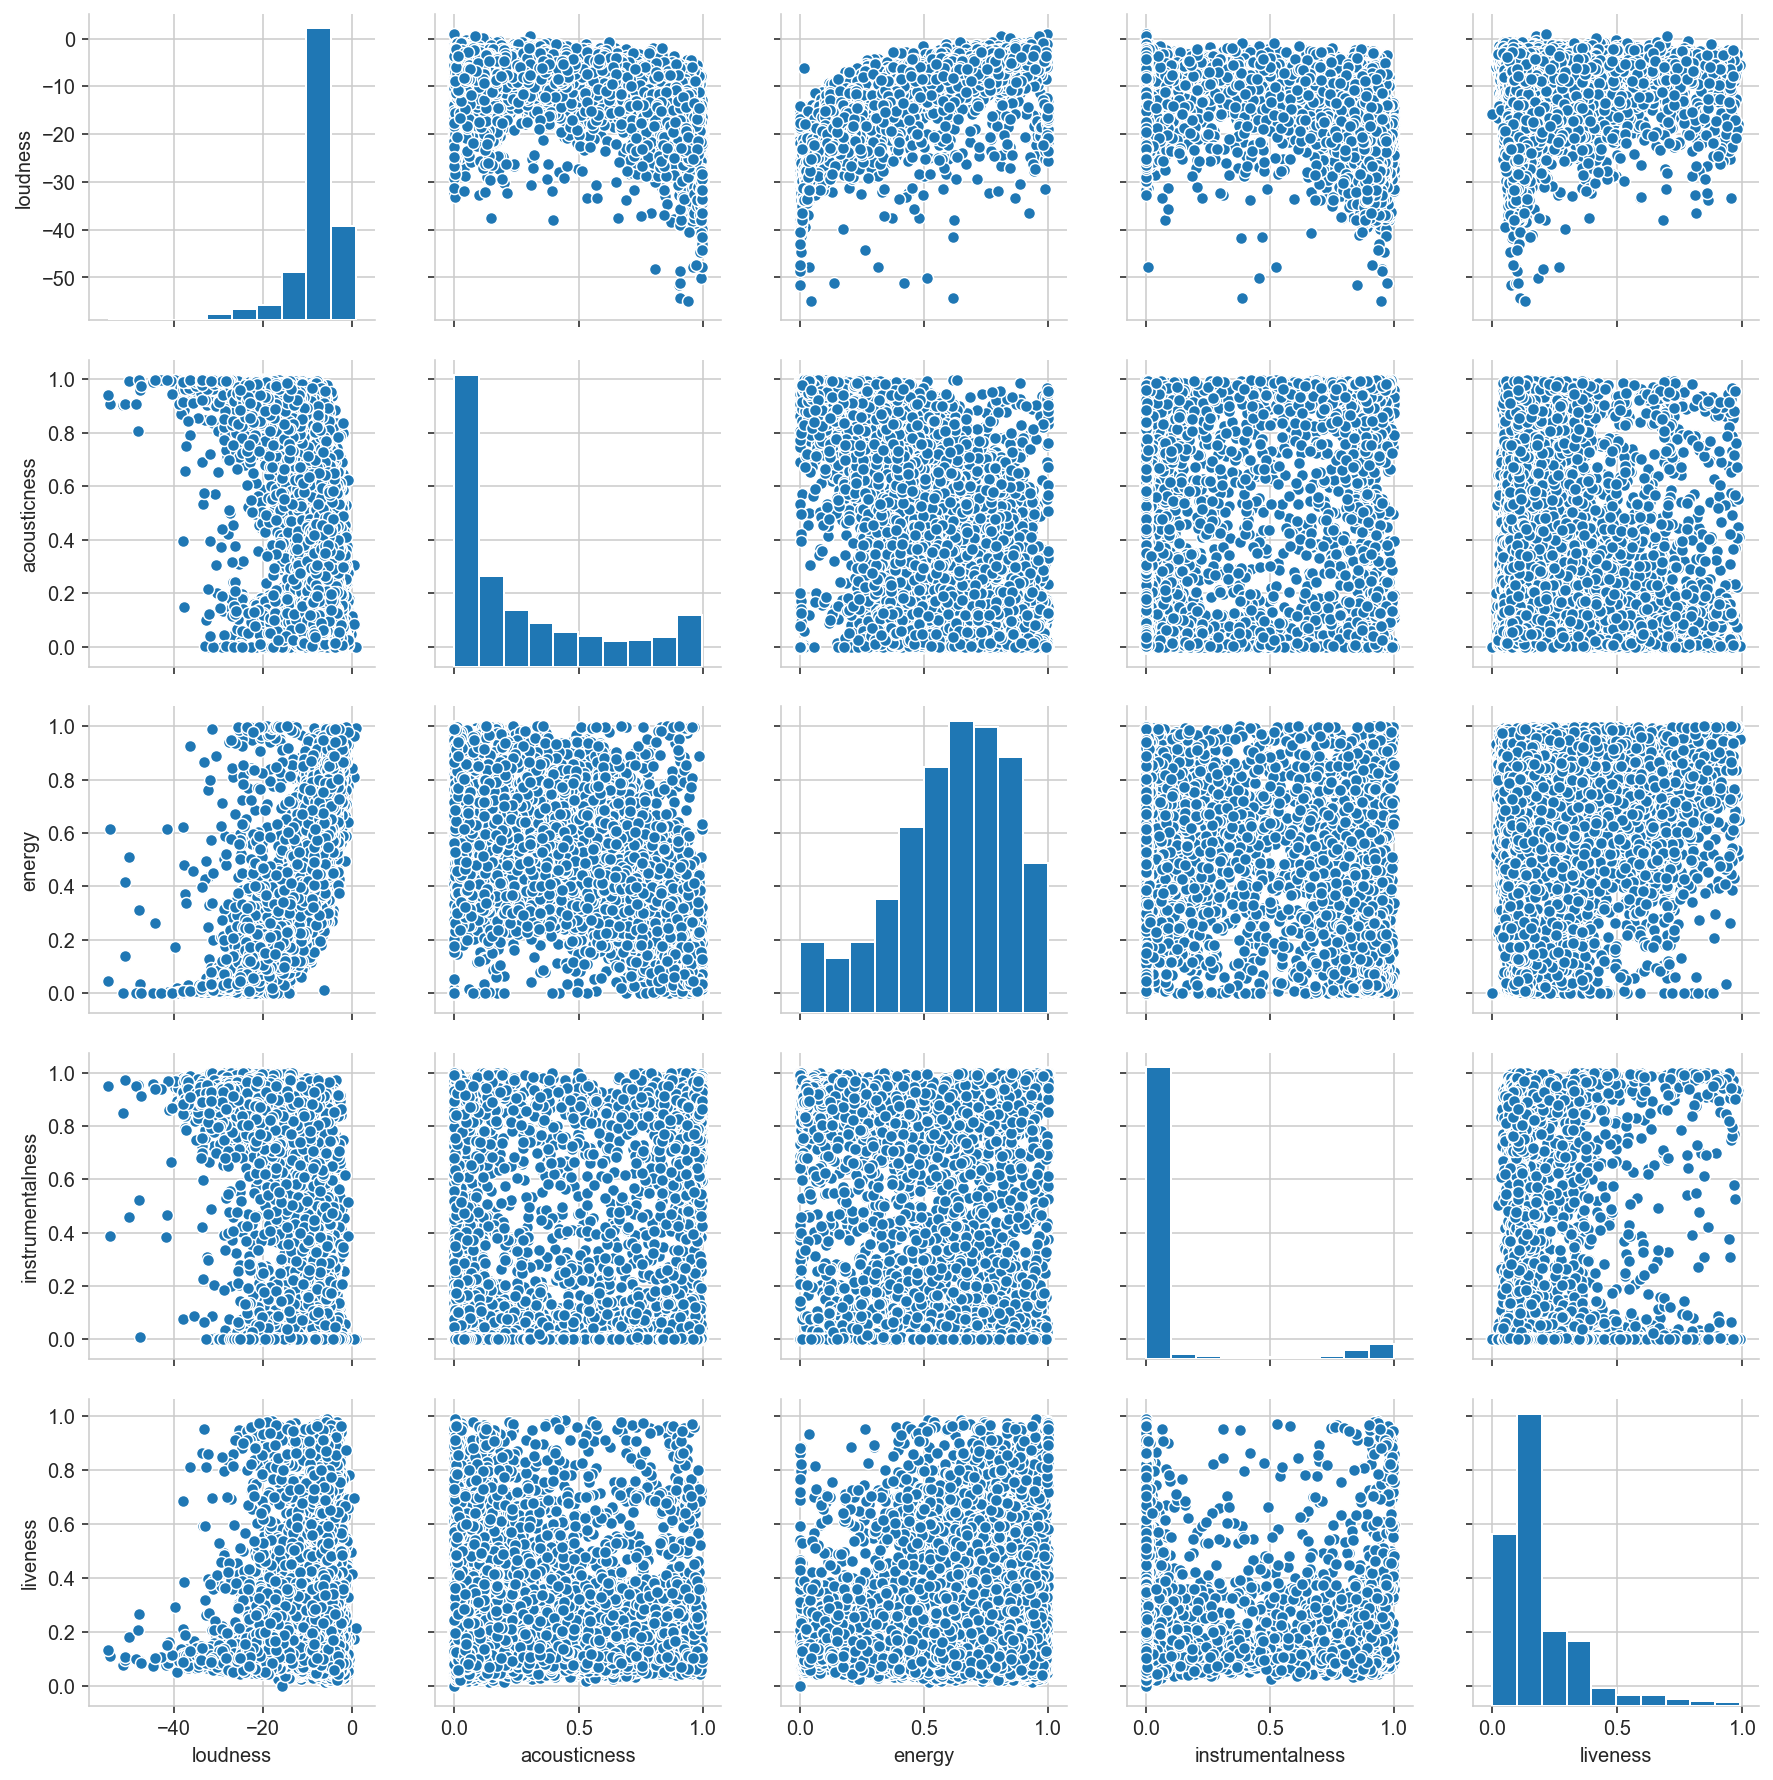

In [122]:
sns.pairplot(data,vars= ['loudness','acousticness','energy','instrumentalness','liveness'])

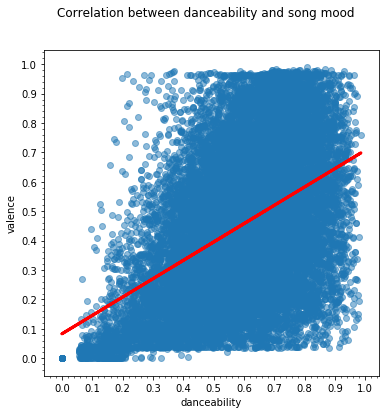

In [16]:
# Tried to find correlation between valence and dancebility by training a linear
x = data["danceability"].values
y = data["valence"].values

#Reshaping the dataset x and y axis
x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

#Training the linear regression model to the dataset
regr = linear_model.LinearRegression()
regr.fit(x, y)

#Plotting the Correlation between danceability and song mood using the 'regr' model trained.
fig = plt.figure(figsize=(6, 6))
fig.suptitle("Correlation between danceability and song mood")

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)
plt.xticks(())
plt.yticks(())

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

plt.xlabel("danceability")
plt.ylabel("valence")

plt.show()

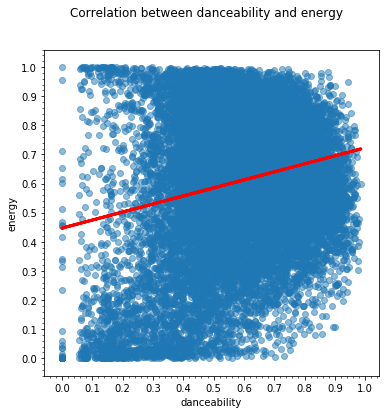

In [17]:
#Same correlation technique to check correlation between danceability and energy
x = data["danceability"].values
y = data["energy"].values

x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)

fig = plt.figure(figsize=(6, 6))
fig.suptitle("Correlation between danceability and energy")

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)
plt.xticks(())
plt.yticks(())

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

plt.xlabel("danceability")
plt.ylabel("energy")

plt.show()

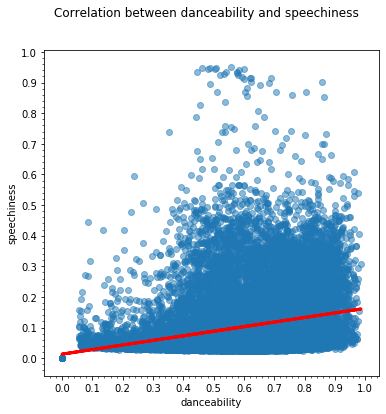

In [18]:
#Same correlation technique to check correlation between danceability and speechiness
x = data["danceability"].values
y = data["speechiness"].values

x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)

fig = plt.figure(figsize=(6, 6))
fig.suptitle("Correlation between danceability and speechiness")

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)
plt.xticks(())
plt.yticks(())

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

plt.xlabel("danceability")
plt.ylabel("speechiness")

plt.show()



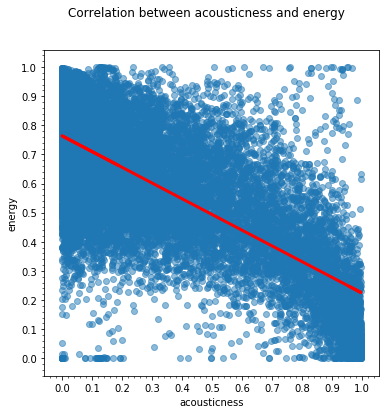

In [19]:
#Same correlation technique to check correlation between acousticness and energy
x = data["acousticness"].values
y = data["energy"].values

x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)

fig = plt.figure(figsize=(6, 6))
fig.suptitle("Correlation between acousticness and energy")

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)
plt.xticks(())
plt.yticks(())

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

plt.xlabel("acousticness")
plt.ylabel("energy")

plt.show()

In [20]:


pos_tempo = data[data['popularity'] == 1]['tempo']
neg_tempo = data[data['popularity'] == 0]['tempo']
pos_dance = data[data['popularity'] == 1]['danceability']
neg_dance = data[data['popularity'] == 0]['danceability']
pos_duration = data[data['popularity'] == 1]['duration_ms']
neg_duration = data[data['popularity'] == 0]['duration_ms']
pos_loudness = data[data['popularity'] == 1]['loudness']
neg_loudness = data[data['popularity'] == 0]['loudness']
pos_speechiness = data[data['popularity'] == 1]['speechiness']
neg_speechiness = data[data['popularity'] == 0]['speechiness']
pos_valence = data[data['popularity'] == 1]['valence']
neg_valence = data[data['popularity'] == 0]['valence']
pos_energy = data[data['popularity'] == 1]['energy']
neg_energy = data[data['popularity'] == 0]['energy']
pos_acousticness = data[data['popularity'] == 1]['acousticness']
neg_acousticness = data[data['popularity'] == 0]['acousticness']
pos_key = data[data['popularity'] == 1]['key']
neg_key = data[data['popularity'] == 0]['key']
pos_instrumentalness = data[data['popularity'] == 1]['instrumentalness']
neg_instrumentalness = data[data['popularity'] == 0]['instrumentalness']



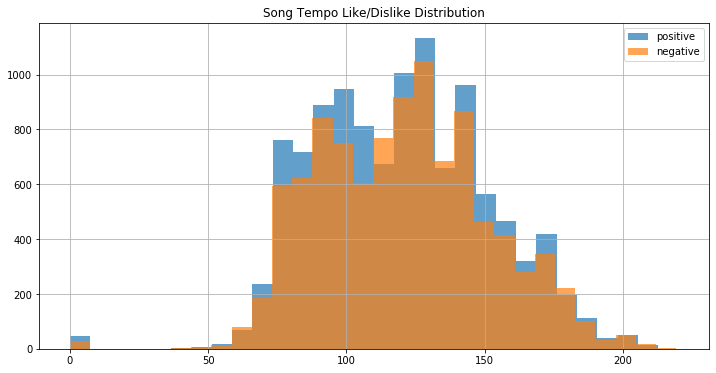

In [21]:
fig = plt.figure(figsize=(12, 6))
plt.title("Song Tempo Like/Dislike Distribution")
pos_tempo.hist(alpha=0.7, bins=30, label='positive')
neg_tempo.hist(alpha=0.7, bins=30, label='negative')
plt.legend(loc="upper right")

C:\Users\ERDEM\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
C:\Users\ERDEM\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\ERDEM\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the

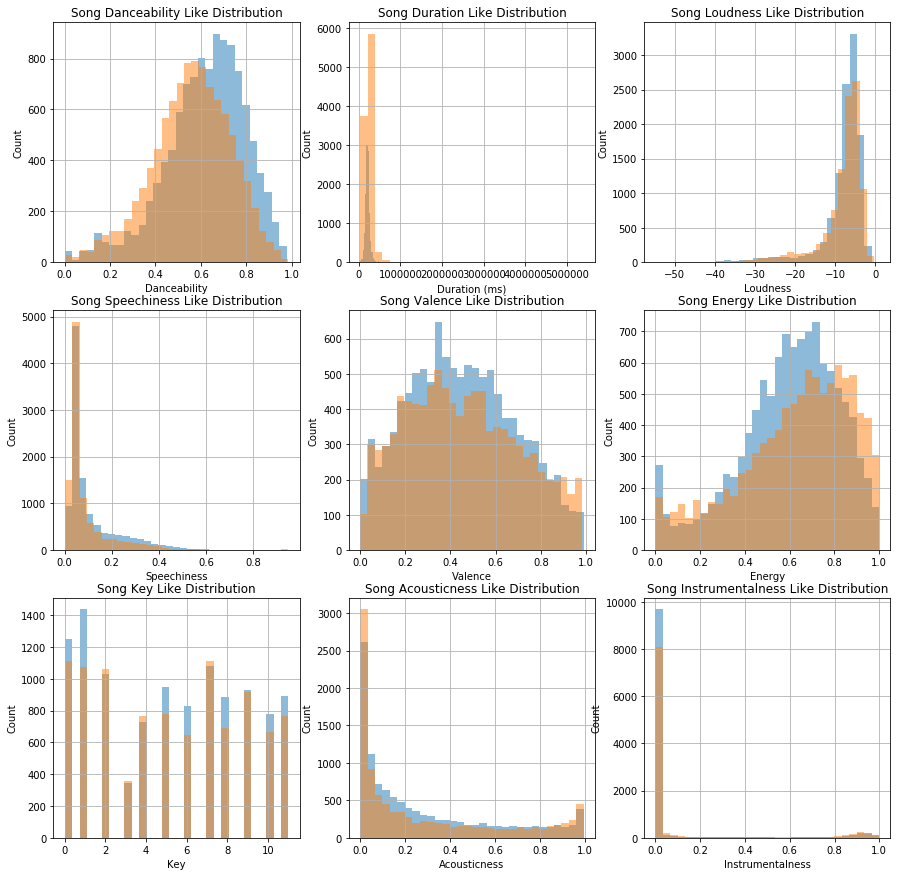

In [22]:
fig2 = plt.figure(figsize=(15, 15))

# Danceability
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title("Song Danceability Like Distribution")
pos_dance.hist(alpha=0.5, bins=30)
ax4 = fig2.add_subplot(331)
neg_dance.hist(alpha=0.5, bins=30)


# Duration
ax5 = fig2.add_subplot(332)
pos_duration.hist(alpha=0.5, bins=30)
ax5.set_xlabel('Duration (ms)')
ax5.set_ylabel('Count')
ax5.set_title("Song Duration Like Distribution")
ax6 = fig2.add_subplot(332)
neg_duration.hist(alpha=0.5, bins=30)


# Loudness
ax7 = fig2.add_subplot(333)
pos_loudness.hist(alpha=0.5, bins=30)
ax7.set_xlabel('Loudness')
ax7.set_ylabel('Count')
ax7.set_title("Song Loudness Like Distribution")

ax8 = fig2.add_subplot(333)
neg_loudness.hist(alpha=0.5, bins=30)

# Speechiness
ax9 = fig2.add_subplot(334)
pos_speechiness.hist(alpha=0.5, bins=30)
ax9.set_xlabel('Speechiness')
ax9.set_ylabel('Count')
ax9.set_title("Song Speechiness Like Distribution")

ax10 = fig2.add_subplot(334)
neg_speechiness.hist(alpha=0.5, bins=30)

# Valence
ax11 = fig2.add_subplot(335)
pos_valence.hist(alpha=0.5, bins=30)
ax11.set_xlabel('Valence')
ax11.set_ylabel('Count')
ax11.set_title("Song Valence Like Distribution")

ax12 = fig2.add_subplot(335)
neg_valence.hist(alpha=0.5, bins=30)

# Energy
ax13 = fig2.add_subplot(336)
pos_energy.hist(alpha=0.5, bins=30)
ax13.set_xlabel('Energy')
ax13.set_ylabel('Count')
ax13.set_title("Song Energy Like Distribution")

ax14 = fig2.add_subplot(336)
neg_energy.hist(alpha=0.5, bins=30)

# Key
ax15 = fig2.add_subplot(337)
pos_key.hist(alpha=0.5, bins=30)
ax15.set_xlabel('Key')
ax15.set_ylabel('Count')
ax15.set_title("Song Key Like Distribution")

ax15 = fig2.add_subplot(337)
neg_key.hist(alpha=0.5, bins=30)

# Acousticness
ax16 = fig2.add_subplot(338)
pos_acousticness.hist(alpha=0.5, bins=30)
ax16.set_xlabel('Acousticness')
ax16.set_ylabel('Count')
ax16.set_title("Song Acousticness Like Distribution")

ax16 = fig2.add_subplot(338)
neg_acousticness.hist(alpha=0.5, bins=30)

# Instrumentalness
ax17 = fig2.add_subplot(339)
pos_instrumentalness.hist(alpha=0.5, bins=30)
ax17.set_xlabel('Instrumentalness')
ax17.set_ylabel('Count')
ax17.set_title("Song Instrumentalness Like Distribution")

ax17 = fig2.add_subplot(339)
neg_instrumentalness.hist(alpha=0.5, bins=30)

In [136]:
# drop string features (like names)
#data.drop(['Unnamed: 0','track_id'], axis=1, inplace=True)

# the songs, "X" axis
X = data.loc[:,["acousticness", "danceability", "duration_ms", "energy",  "key", "liveness","mode",
             "speechiness", "tempo", "time_signature", "valence","YEAR"]]

# and their label/class, "y" axis
y = data['popularity']

# split the data into train sets (X_train, y_train) and test sets (X_test, y_test).
# the testing sets are usually smaller than the training sets.
# this time I'll use 20% for testing and 80% for training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=100)


In [137]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest_test = round(random_forest.score(X_test, y_test) * 100, 2)
Precision_random_forest= round(precision_score(y_test, Y_pred) * 100, 2)
Recall_random_forest = round(recall_score(y_test, Y_pred) * 100, 2)
f1_random_forest= round(f1_score(y_test, Y_pred) * 100, 2)

In [138]:
Extra_Trees = ExtraTreesClassifier(n_estimators=100 )
Extra_Trees.fit(X_train, y_train)

Y_prediction = Extra_Trees.predict(X_test)

Extra_Trees.score(X_train, y_train)

acc_extra_tree = round(Extra_Trees.score(X_train, y_train) * 100, 2)
acc_extra_tree_test = round(Extra_Trees.score(X_test, y_test) * 100, 2)
Precision_Extra_Trees= round(precision_score(y_test, Y_pred) * 100, 2)
Recall_Extra_Trees = round(recall_score(y_test, Y_pred) * 100, 2)
f1_Extra_Trees= round(f1_score(y_test, Y_pred) * 100, 2)

In [139]:
Gradient_Boosting = GradientBoostingClassifier(n_estimators=100)
Gradient_Boosting.fit(X_train, y_train)

Y_prediction = Gradient_Boosting.predict(X_test)

Gradient_Boosting.score(X_train, y_train)
acc_Gradient_Boosting = round(Gradient_Boosting.score(X_train, y_train) * 100, 2)
acc_Gradient_Boosting_test = round(Gradient_Boosting.score(X_test, y_test)* 100, 2)
Precision_Gradient_Boosting= round(precision_score(y_test, Y_pred) * 100, 2)
Recall_Gradient_Boosting = round(recall_score(y_test, Y_pred) * 100, 2)
f1_Gradient_Boosting= round(f1_score(y_test, Y_pred) * 100, 2)

In [140]:
AdaBoost_Classifier = AdaBoostClassifier(n_estimators=100)
AdaBoost_Classifier.fit(X_train, y_train)

Y_prediction = AdaBoost_Classifier.predict(X_test)

AdaBoost_Classifier.score(X_train, y_train)
acc_AdaBoost_Classifier = round(AdaBoost_Classifier.score(X_train, y_train) * 100, 2)
acc_AdaBoost_Classifier_test = round(AdaBoost_Classifier.score(X_test, y_test) * 100, 2)
Precision_AdaBoost_Classifier= round(precision_score(y_test, Y_pred) * 100, 2)
Recall_AdaBoost_Classifier = round(recall_score(y_test, Y_pred) * 100, 2)
f1_AdaBoost_Classifier= round(f1_score(y_test, Y_pred) * 100, 2)

In [141]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log_test = round(logreg.score(X_test, y_test) * 100, 2)
Precision_logreg= round(precision_score(y_test, Y_pred) * 100, 2)
Recall_logreg = round(recall_score(y_test, Y_pred) * 100, 2)
f1_logreg= round(f1_score(y_test, Y_pred) * 100, 2)

In [142]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train) 
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn_test = round(knn.score(X_test, y_test) * 100, 2)
Precision_knn= round(precision_score(y_test, Y_pred) * 100, 2)
Recall_knn = round(recall_score(y_test, Y_pred) * 100, 2)
f1_knn= round(f1_score(y_test, Y_pred) * 100, 2)

In [143]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian_test = round(gaussian.score(X_test, y_test) * 100, 2)
Precision_gaussian= round(precision_score(y_test, Y_pred) * 100, 2)
Recall_gaussian = round(recall_score(y_test, Y_pred) * 100, 2)
f1_gaussian= round(f1_score(y_test, Y_pred) * 100, 2)

In [144]:
svc = SVC()
svc.fit(X_train, y_train)

Y_pred = svc.predict(X_test)

acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc_test = round(svc.score(X_test, y_test) * 100, 2)
Precision_svc= round(precision_score(y_test, Y_pred) * 100, 2)
Recall_svc = round(recall_score(y_test, Y_pred) * 100, 2)
f1_svc = round(f1_score(y_test, Y_pred) * 100, 2)

In [145]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train) 
Y_pred = decision_tree.predict(X_test) 
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree_test = round(decision_tree.score(X_test, y_test) * 100, 2)
Precision_decision_tree = round(precision_score(y_test, Y_pred) * 100, 2)
Recall_decision_tree =round(recall_score(y_test, Y_pred) * 100, 2)
f1_decision_tree =round(f1_score(y_test, Y_pred) * 100, 2)
print("Score:", acc_decision_tree)
print("Test:",acc_decision_tree_test)
print("Precision:", Precision_decision_tree)
print("Recall:",Recall_decision_tree)
print("f1:",f1_decision_tree)

Score: 99.98
Test: 69.32
Precision: 69.76
Recall: 71.53
f1: 70.63


In [146]:
results = pd.DataFrame({
    'Model': ['SVC', 'KNN', 'Logistic Regression', 
              'Random Forest','gaussian',
              'Decision Tree','Extra_Trees','Gradient_Boosting','AdaBoost_Classifier'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
               acc_decision_tree,acc_extra_tree,acc_Gradient_Boosting,acc_AdaBoost_Classifier],
'Test Score' : [acc_svc_test, acc_knn_test, acc_log_test, 
              acc_random_forest_test, acc_gaussian_test, 
               acc_decision_tree_test,acc_extra_tree_test,acc_Gradient_Boosting_test,acc_AdaBoost_Classifier_test],
'Test Precision' : [Precision_svc, Precision_knn, Precision_logreg, 
              Precision_random_forest, Precision_gaussian, 
               Precision_decision_tree,Precision_Extra_Trees,Precision_Gradient_Boosting,Precision_AdaBoost_Classifier],
'Test Recall' : [Recall_svc, Recall_knn, Recall_logreg, 
              Recall_random_forest, Recall_gaussian, 
               Recall_decision_tree,Recall_Extra_Trees,Recall_Gradient_Boosting,Recall_AdaBoost_Classifier],
'Test f1' : [f1_svc, f1_knn, f1_logreg, f1_random_forest, f1_gaussian, 
               f1_decision_tree,f1_Extra_Trees,f1_Gradient_Boosting,f1_AdaBoost_Classifier] })
result_df = results.sort_values(by='Score', ascending=False)
#result_df = result_df.set_index('Score')
result_df.head(20)

,Model,Score,Test Score,Test Precision,Test Recall,Test f1
3,Random Forest,99.98,78.20,61.75,87.03,72.24
5,Decision Tree,99.98,69.32,69.76,71.53,70.63
6,Extra_Trees,99.98,77.75,61.75,87.03,72.24
7,Gradient_Boosting,78.96,78.67,61.75,87.03,72.24
8,AdaBoost_Classifier,77.32,78.13,61.75,87.03,72.24
1,KNN,76.24,55.21,56.41,57.91,57.15
4,gaussian,65.98,65.50,61.75,87.03,72.24
0,SVC,58.67,58.67,56.78,83.26,67.51
2,Logistic Regression,58.31,58.46,56.82,81.09,66.82


In [150]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores1 = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
scores2= cross_val_score(rf, X_train, y_train, cv=10, scoring = "recall")
scores3 = cross_val_score(rf, X_train, y_train, cv=10, scoring = "precision")


print("Mean accuracy:", scores1.mean())
print("Mean recall:", scores2.mean())
print("Mean precision:", scores3.mean())

Mean accuracy: 0.778562115660123
Mean recall: 0.7288745760175579
Mean precision: 0.8338917932526545


In [81]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.77995255 0.76749703 0.77283511 0.77520759 0.8084223  0.76156584
 0.79240807 0.76631079 0.79525223 0.77091988]
Mean: 0.7790371395081154
Standard Deviation: 0.014231785467188342


In [82]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "recall")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.734375   0.70758929 0.71986607 0.72209821 0.77678571 0.70758929
 0.74888393 0.71205357 0.7421875  0.71843575]
Mean: 0.7289864325618515
Standard Deviation: 0.020804637574902595


In [83]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring = "precision")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.82926829 0.82831518 0.83533882 0.83060453 0.83449147]
Mean: 0.8316036606382642
Standard Deviation: 0.0028127271462826367


In [151]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
YEAR,0.322
duration_ms,0.089
danceability,0.085
acousticness,0.082
energy,0.079
speechiness,0.076
valence,0.073
tempo,0.072
liveness,0.069


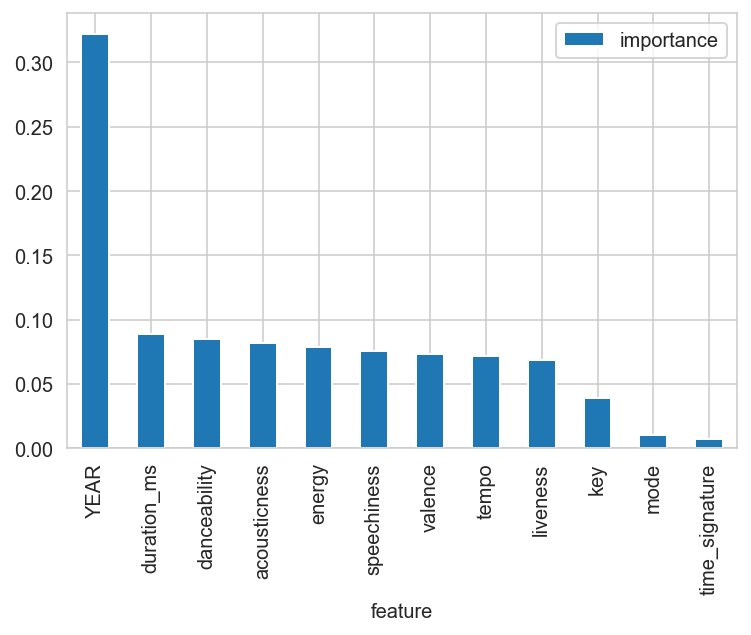

In [152]:
importances.plot.bar()

In [153]:
X_train  = X_train.drop("mode", axis=1)
X_test  = X_test.drop("mode", axis=1)

X_train  = X_train.drop("time_signature", axis=1)
X_test  = X_test.drop("time_signature", axis=1)

In [154]:

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest_test = round(random_forest.score(X_test, y_test) * 100, 2)
print("The score for RandomForestClassifier is")
print("Training: {:6.2f}%".format(100*random_forest.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*random_forest.score(X_test, y_test)))
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

The score for RandomForestClassifier is
Training:  99.98%
Test set:  78.60%
oob score: 77.2 %


In [88]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5], "min_samples_split" : [2, 4], "n_estimators": [100, 400, 700]}
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=100, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, y_train)
clf.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 700}

In [155]:
random_forest = RandomForestClassifier(criterion = "entropy", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 4,   
                                       n_estimators=700, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=100, 
                                       n_jobs=-1)

random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
print("The score for RandomForestClassifier is")
print("Training: {:6.2f}%".format(100*random_forest.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*random_forest.score(X_test, y_test)))
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")


The score for RandomForestClassifier is
Training:  99.97%
Test set:  78.88%
oob score: 77.94 %


In [185]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, y_train, cv=10)
confusion_matrix(y_train, predictions)

array([[6584, 1315],
       [2362, 6597]], dtype=int64)

In [158]:
# Random Forest Classification
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
array = data.values
#X = data.loc[:,["acousticness", "danceability", "duration_ms", "energy",  "key", "liveness", "speechiness", "tempo", "time_signature", "valence"]]
#y = data['popularity']
seed = 100
num_trees = 700
max_features = 'auto'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

C:\Users\ERDEM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.7801636799476224


In [159]:
from sklearn.metrics import precision_score, recall_score,f1_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))
print("f1:",f1_score(y_train, predictions))

Precision: 0.8337967644084934
Recall: 0.7363545038508762
f1: 0.7820520419655029


In [160]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.7820520419655029

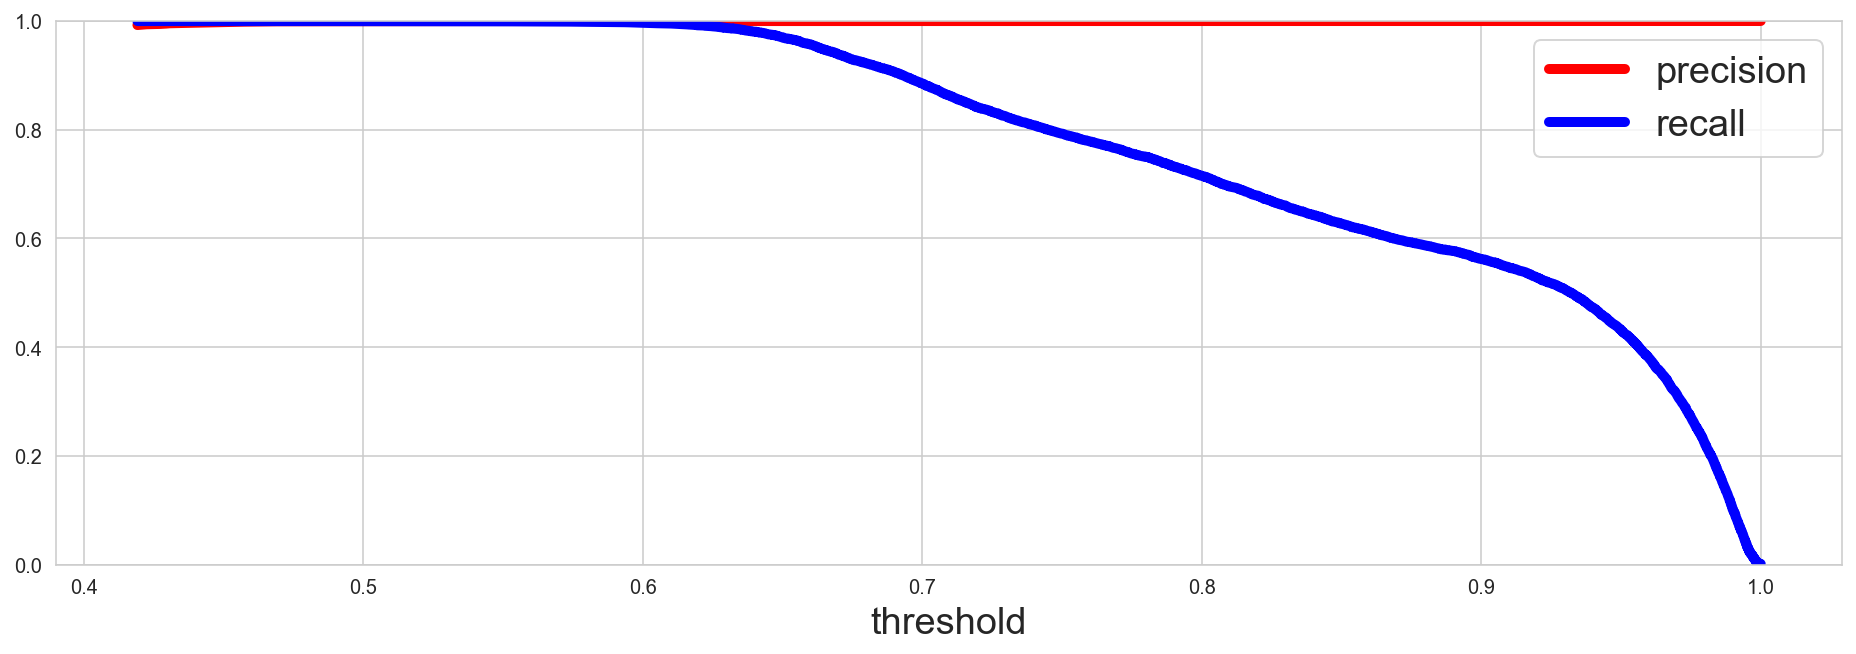

In [161]:
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])
plt.figure(figsize = (16,5))

plot_precision_and_recall(precision, recall, threshold)
plt.show()

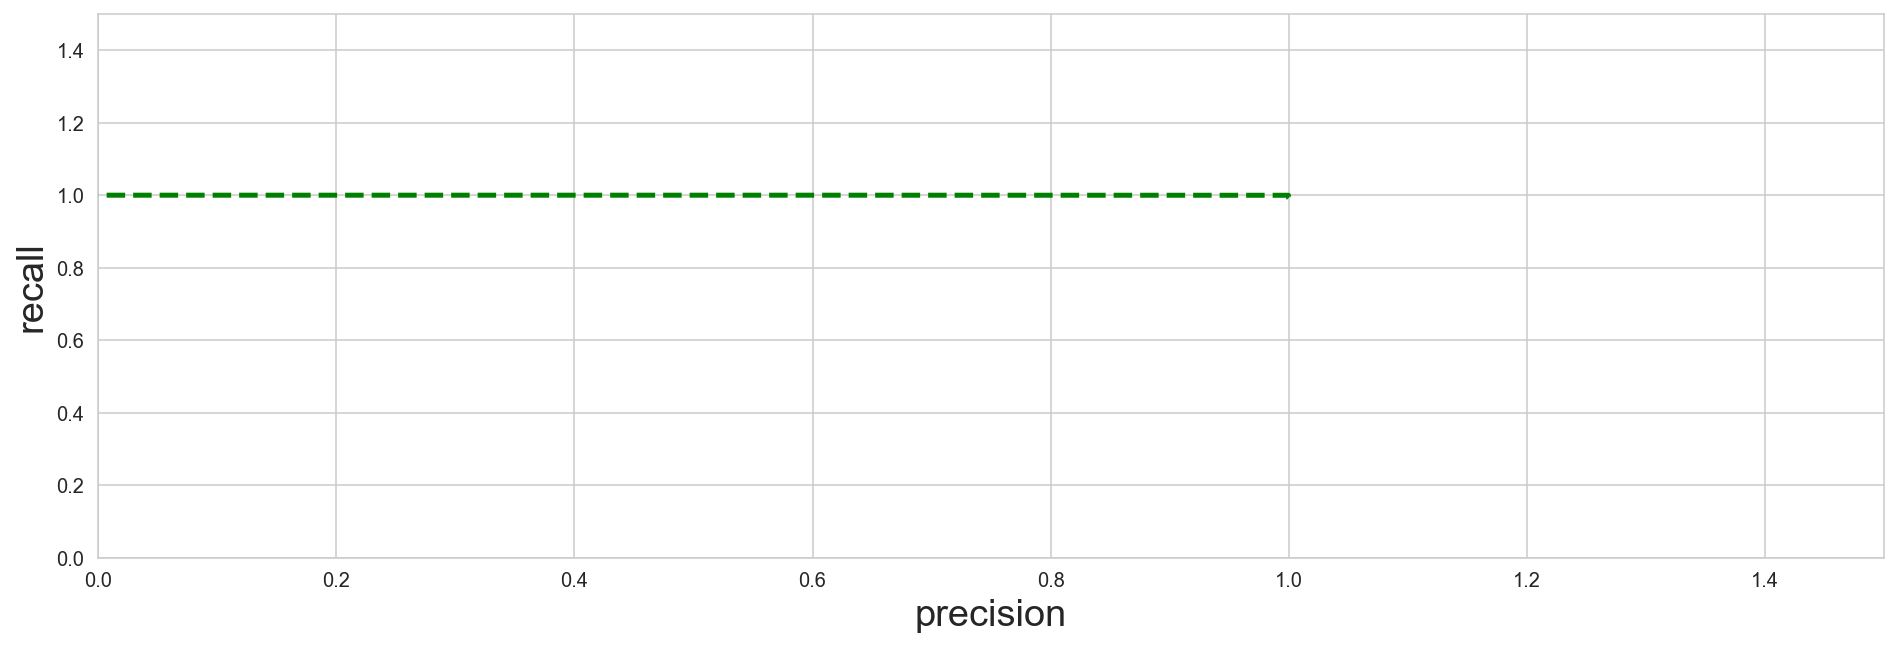

In [162]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize = (16,5))
plot_precision_vs_recall(precision, recall)
plt.show()

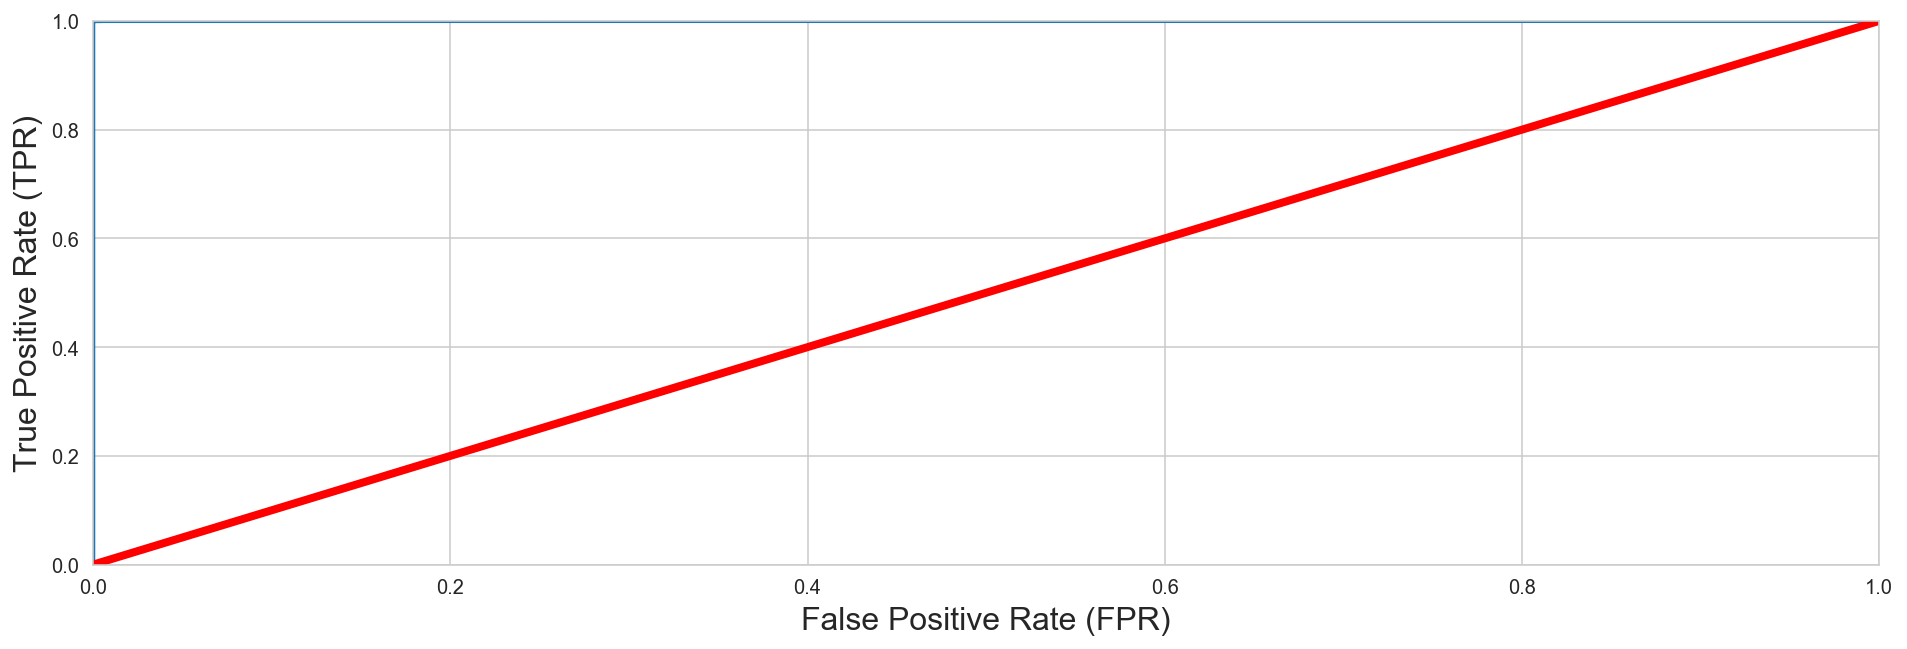

In [163]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize = (16,5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [164]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9999983113631791


In [165]:
y_predict = random_forest.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Default threshold:
Precision: 0.8302,   Recall: 0.7424


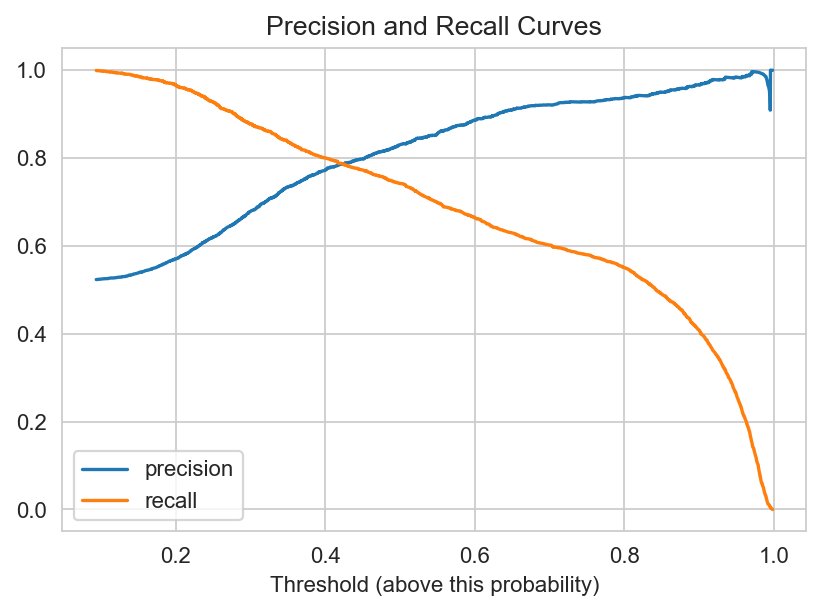

In [177]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, random_forest.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability)');
plt.title('Precision and Recall Curves');

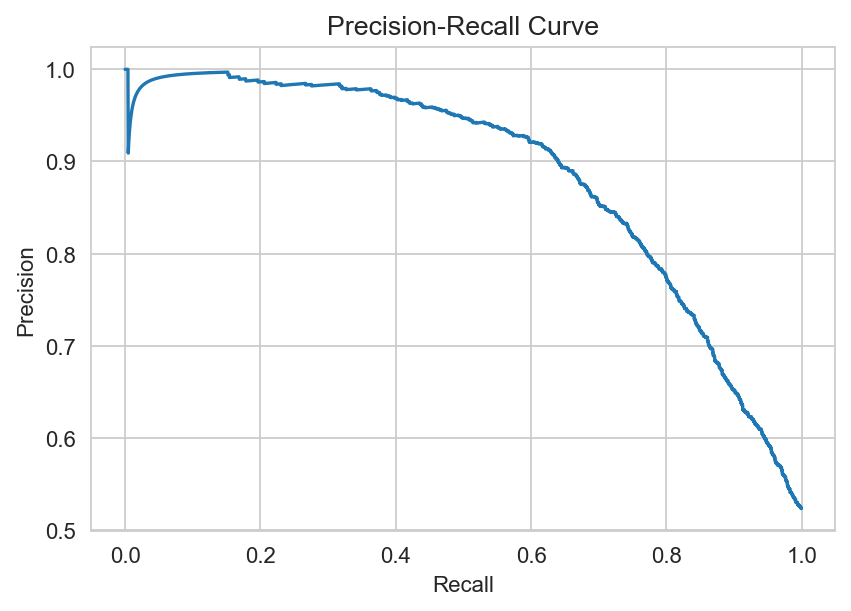

In [167]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

ROC AUC score =  0.8577910876705549


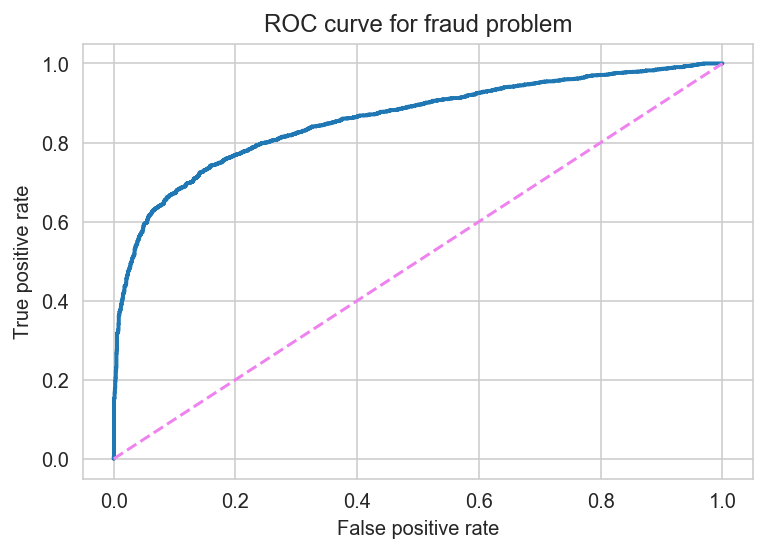

In [168]:


fpr, tpr, thresholds = roc_curve(y_test, random_forest.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem');
print("ROC AUC score = ", roc_auc_score(y_test, random_forest.predict_proba(X_test)[:,1]))

In [198]:
def make_confusion_matrix(model, threshold=0.78):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    #predictions = cross_val_predict(random_forest, X_train, y_train, cv=10)
    y_predict = (model.predict_proba(X_train)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_train, y_predict)
    plt.figure(dpi=80)
    plt.figure(figsize = (16,5))
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['popular', 'nonpopular'],
           yticklabels=['popular', 'nonpopular']);
    plt.xlabel('prediction')
    plt.ylabel('actual')
    plt.title('confusion_matrix')

<Figure size 480x320 with 0 Axes>

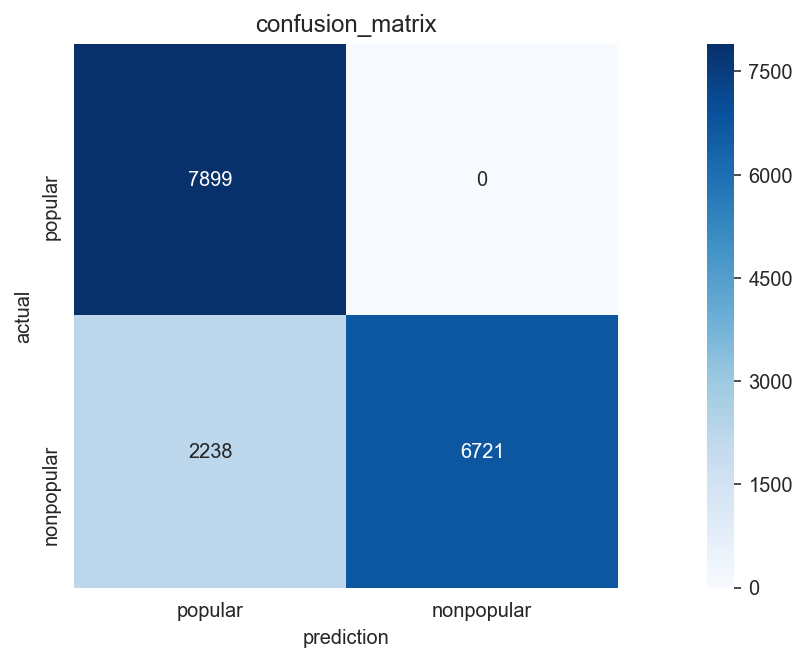

In [199]:
make_confusion_matrix(random_forest)

In [201]:
pred_probs = random_forest.predict_proba([[1,1,6,0.589,1,0.6380,0,0,0,2019]]).flat

In [202]:
np.argsort(pred_probs)[::-1]

array([1, 0], dtype=int64)

In [203]:
def predict():

    x_input = []
    for i in range(len(lr_model.feature_names)):
        f_value = float(
            request.args.get(lr_model.feature_names[i], "0")
            )
        x_input.append(f_value)

    pred_probs = lr_model.predict_proba([x_input]).flat

    return flask.render_template('predictor.html',
    feature_names=lr_model.feature_names,
    x_input=x_input,
    prediction=np.argsort(pred_probs)[::-1]
    )

In [204]:
%pylab inline

# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

# uses custom metis style sheet for notebooks
from IPython.core.display import HTML
HTML("""<link rel="stylesheet" href="https://soph.info/metis/nb.css" type="text/css"/>""")

#######################
#       imports       #
#######################
import pandas as pd
import seaborn as sns
import sklearn

sns.set_style("whitegrid")

Populating the interactive namespace from numpy and matplotlib


In [205]:
from sklearn import datasets, model_selection


x1 = data.loc[:,["acousticness", "danceability", "duration_ms", "energy",  "key", "liveness",
             "speechiness", "tempo",  "valence","YEAR"]]
y1 = data['popularity']

x1_train, x1_test, y1_train, y1_test = model_selection.train_test_split(x1,y1, stratify=y1)

In [206]:
from sklearn import linear_model

# fit our model and score it on the test set
lr_model = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 5, 
                                       min_samples_split = 2,   
                                       n_estimators=1500, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=100, 
                                       n_jobs=-1)
lr_model.fit(x1_train, y1_train)

print(f"""
train score: {lr_model.score(x1_train, y1_train):%}
test score: {lr_model.score(x1_test, y1_test):%}
""")


train score: 90.584662%
test score: 78.136269%



In [207]:
lr_model.feature_names = x1
lr_model.target_names = y1

In [109]:
!mkdir -p predictor

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file predictor already exists.
Error occurred while processing: predictor.


In [208]:
import pickle

with open("predictor/lr.pkl", "wb") as f:
    pickle.dump(lr_model, f)

In [209]:
with open("predictor/lr.pkl", "rb") as f:
    lr_model2 = pickle.load(f)

In [212]:
lr_model2.predict([[1,1,6,0.589,1,0.6380,0,0,0,2019]])

array([1], dtype=int64)

In [213]:
lr_model2.predict_proba([[1,1,6,0.589,1,0.6380,0,0,0,2019]])

array([[0.30589727, 0.69410273]])

In [214]:
pred_probs = lr_model2.predict_proba([[1,1,6,0.589,1,0.6380,0,0,0,2019]]).flat

In [215]:
np.argsort(pred_probs)[::-1]

array([1, 0], dtype=int64)

In [216]:
pred_str = ""
for class_i in np.argsort(pred_probs)[::-1]:
    pred_str += f"""
    {lr_model2.target_names[class_i]}: {pred_probs[class_i]:g}
    """
print(pred_str)


    1: 0.694103
    
    1: 0.305897
    
